<a href="https://colab.research.google.com/github/GabrielPSMartins/atividade_ia/blob/main/atividade_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Carregando os dados

df = pd.read_csv('dataset.csv')

In [ ]:
# Visualizando as primeiras linhas

print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms explicit  danceability  \
0                      Comedy        73.0     230666.0    False         0.676   
1            Ghost - Acoustic        55.0     149610.0    False         0.420   
2              To Begin Again

In [ ]:
# Informações gerais

print(df.info())

In [ ]:
# Ver os gêneros musicais únicos

print(df['track_genre'].unique())

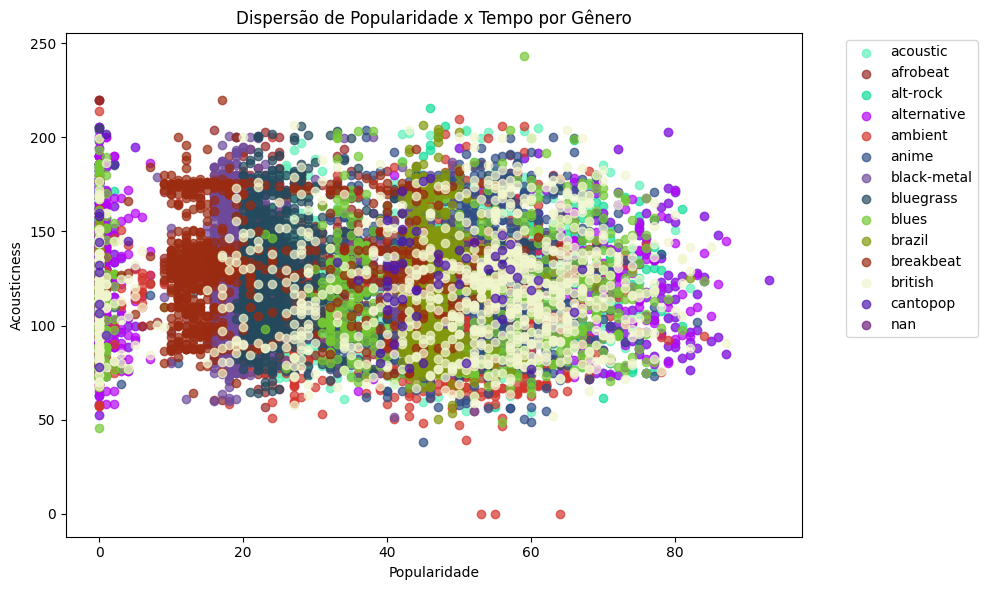

In [ ]:
# Gráfico de dispersão entre popularidade e acousticness, separado por gênero

genres = df['track_genre'].unique()
np.random.seed(42)
colors = {genre: np.random.rand(3,) for genre in genres}

plt.figure(figsize=(10, 6))
for genre in genres:
    subset = df[df['track_genre'] == genre]
    plt.scatter(subset['popularity'], subset['tempo'], label=genre, color=colors[genre], alpha=0.7)

plt.xlabel('Popularidade')
plt.ylabel('Acousticness')
plt.title('Dispersão de Popularidade x Tempo por Gênero')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Pairplot para comparar variáveis numéricas

sns.pairplot(df[['popularity', 'acousticness', 'danceability', 'track_genre']], hue='track_genre')
plt.show()

In [ ]:
# Heatmap de correlação entre variáveis numéricas

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

In [ ]:
# Remover colunas desnecessárias

df.drop(columns=["track_id"], inplace=True, errors='ignore')

In [ ]:
# Separar variáveis independentes (X) e alvo (y)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Converter colunas categóricas para numéricas

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
# Dividir os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalizar os dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Dicionário para guardar os resultados dos modelos

resultados = {}

In [ ]:
# Modelos que serão comparados

modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Gêneros mais comuns no conjunto de teste (os 10 principais)

top_genres = y_test.value_counts().nlargest(10).index.tolist()

In [ ]:
# Função para exibir matriz de confusão

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão (Top 10 Gêneros)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Pré-processamento
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Codificar colunas categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Remover linhas com valores nulos de X e y
dados_completos = pd.concat([X, y], axis=1).dropna()
X = dados_completos.iloc[:, :-1]
y = dados_completos.iloc[:, -1]

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Avaliação de cada modelo

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


Modelo: Naive Bayes
Acurácia: 0.9370
Relatório de Classificação (Top 10 Gêneros):
              precision    recall  f1-score   support

    acoustic       0.94      0.97      0.95       301
    afrobeat       0.95      0.92      0.94       306
    alt-rock       0.89      0.94      0.91       300
 alternative       0.95      0.88      0.91       303
     ambient       0.89      0.96      0.92       311
       anime       0.97      0.89      0.93       320
 black-metal       0.98      0.98      0.98       296
   bluegrass       0.00      0.00      0.00         0
       blues       0.97      0.95      0.96       305
      brazil       0.94      0.94      0.94       284
   breakbeat       0.98      0.93      0.95       298
     british       0.00      0.00      0.00         0

    accuracy                           0.94      3024
   macro avg       0.79      0.78      0.78      3024
weighted avg       0.94      0.94      0.94      3024



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


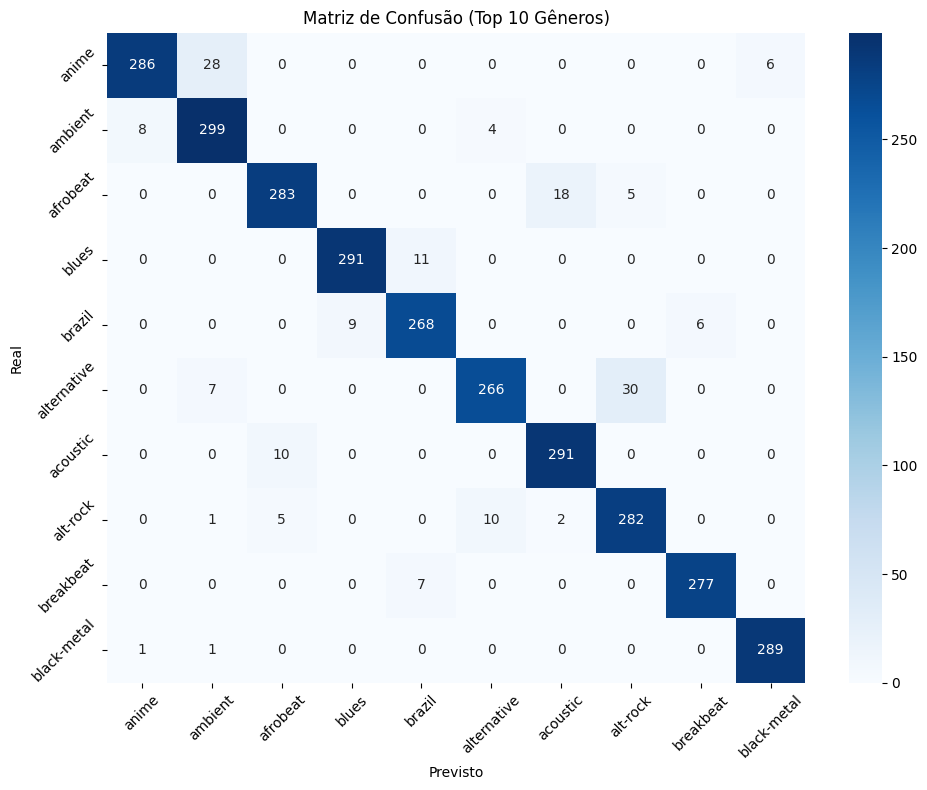

In [ ]:
# Filtro apenas para os gêneros mais comuns

mask = y_test.isin(top_genres)
y_test_filtered = y_test[mask]
y_pred_filtered = pd.Series(y_pred, index=y_test.index)[mask]

cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_genres)
report = classification_report(y_test_filtered, y_pred_filtered, output_dict=True)

resultados[nome] = {
    'Accuracy': acc,
    'Confusion Matrix': cm,
    'Report': report
}

print(f"\nModelo: {nome}")
print(f"Acurácia: {acc:.4f}")
print("Relatório de Classificação (Top 10 Gêneros):")
print(classification_report(y_test_filtered, y_pred_filtered))

plot_confusion_matrix(cm, classes=top_genres)

In [ ]:
# Comparando as acurácias

df_resultados = pd.DataFrame({k: [v['Accuracy']] for k, v in resultados.items()}, index=['Accuracy']).T

print("\nTabela Comparativa de Acurácia:")
print(df_resultados)


Tabela Comparativa de Acurácia:
             Accuracy
Naive Bayes  0.937034


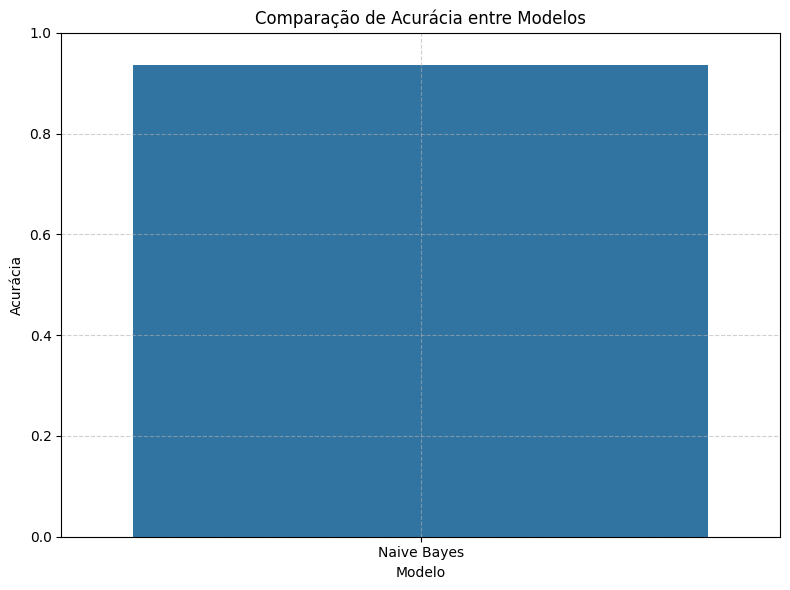

In [ ]:
# Gráfico com as acurácias

plt.figure(figsize=(8, 6))
sns.barplot(x=df_resultados.index, y='Accuracy', data=df_resultados.reset_index())
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Conclusão com melhor modelo

melhor_modelo = df_resultados['Accuracy'].idxmax()

print(f"\nConclusão: O modelo com melhor desempenho foi o {melhor_modelo}, com acurácia de {df_resultados.loc[melhor_modelo, 'Accuracy']:.4f}.")


Conclusão: O modelo com melhor desempenho foi o Naive Bayes, com acurácia de 0.9370.
